In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline

In [2]:
data_url ="https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"
airline_tweets = pd.read_csv(data_url)

In [3]:
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


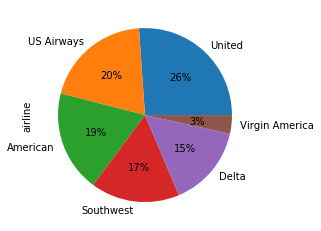

In [4]:
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

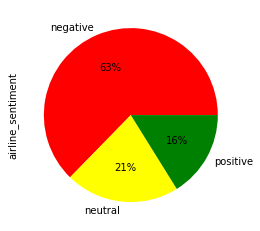

In [5]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

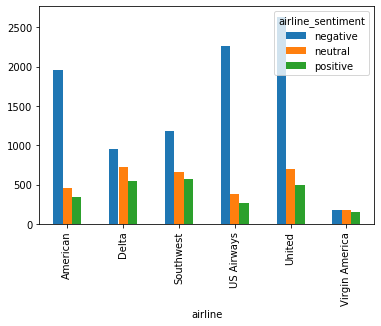

In [6]:
#sentiment respective to each airline
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

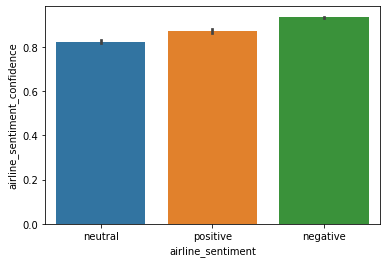

In [7]:
#check airline confidence for ind airline
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=airline_tweets)

# Regular Expression


A Regular Expression is a text string that describes a search pattern which can be used to match or replace patterns inside a string with a minimal amount of code. In this tutorial, we will implement different types of regular expressions in the Python language.

In [8]:
#to use regular expression 
import re 

To search a pattern within a string, the match and findall function of the re package is used.

In [9]:
text = "The film Titanic was released in 1998"

The first parameter of the 'match' function is the regex expression that you want to search. Regex expression starts with the alphabet r followed by the pattern that you want to search. The pattern should be enclosed in single or double quotes like any other string.

In [10]:
result = re.match(r".*", text)

The above regex expression will match the text string, since we are trying to match a string of any length and any character. If a match is found, the match function returns _sre.SRE_Match object as shown below:
Searches for string in data

In [11]:
result.group(0)

'The film Titanic was released in 1998'

In [12]:
text = ""

In [13]:
result = re.match(r".*", text)

Now, if you again execute the following regex expression, a match will be found.
Since we specified to match the string with any length and any character, even an empty string is being matched.

To match a string with a length of at least 1, the following regex expression is used:

In [14]:
result = re.match(r".+", text) #Here the plus sign specifies that the string should have at least one character.

In [15]:
result.group(0)

AttributeError: 'NoneType' object has no attribute 'group'

The match function can be used to find any alphabet letters within a string. Let's initialize the text variable with the following text:

In [16]:
text = "The film Titanic was released in 1998"

Now to find all the alphabet letter, both uppercase and lowercase, we can use the following regex expression:

In [17]:
result = re.match(r"[a-zA-z]+", text)

This regex expression states that match the text string for any alphabets from small a to small z or capital A to capital Z. The plus sign specifies that string should have at least one character. Let's print the match found by the above expression:

In [18]:
print(result.group(0))

The


In the output, you can see that the first word i.e. The is returned. This is because the match function only returns the first match found. In the regex we specified that find the patterns with both small and capital alphabets from a to z. The first match found was The. After the word The there is a space, which is not treated as an alphabet letter, therefore the matching stopped and the expression returned just The, which is the first match.

In [19]:
text = "1998 was the year when the film titanic was released"
result = re.match(r"[a-zA-z]+", text)
type(result)#beacuse the string started with a number

NoneType

The 'search' function is similar to the match function i.e. it tries to match the specified pattern. However, unlike the match function, it matches the pattern globally instead of matching only the first element. Therefore, the search function will return a match even if the string doesn't contain an alphabet at the start of the string but contains an alphabet elsewhere in the string, as shown below:

In [20]:
text = "1998 was the year when the film titanic was released"
result = re.search(r"[a-zA-z]+", text)
print(result.group(0))

was


To check if a string starts with a specific word, you can use the carrot key i.e. ^ followed by the word to match with the search function as shown below. Suppose we have the following string:

In [21]:
text = "XYZ 1998 was the year when the film titanic was released"

In [22]:
result = re.search(r"^1998", text)
type(result)

NoneType

n the output, null will be returned since the text string doesn't contain "1998" directly at the start.

Now let's change the content text variable and add "1998" at the beginning and then check if "1998" is found at the beginning or not. Execute the following script:

To check whether a string ends with a specific word or not, we can use the word in the regular expression, followed by the dollar sign. The dollar sign marks the end of the statement. Take a look at the following example:

In [23]:
text = "was the year when the film titanic was released 1998"
if re.search(r"1998$", text):
    print("Match found")
else:
    print("Match not found")

Match found


# Substituting text in a String

In [24]:
text = "The film Pulp Fiction was released in year 1994"

#to replace the string "Pulp Fiction" with "Forrest Gump" (another movie released in 1994) we can use the sub function as follows:


In [25]:
result = re.sub(r"Pulp Fiction", "Forrest Gump", text)

Now let's substitute all the alphabets in our string with character "X". Execute the following script:

In [26]:
text = "The film Pulp Fiction was released in year 1994"
result = re.sub(r"[a-z]", "X", text)
print(result)

TXX XXXX PXXX FXXXXXX XXX XXXXXXXX XX XXXX 1994


# Removing Digits from a String

The regex expression to find digits in a string is \d. This pattern can be used to remove digits from a string by replacing them with an empty string of length zero as shown below:

In [27]:
text = "The film Pulp Fiction was released in year 1994"
result = re.sub(r"\d", "", text)
print(result)

The film Pulp Fiction was released in year 


In [28]:
#Removing Alphabet Letters from a String
text = "The film Pulp Fiction was released in year 1994"
result = re.sub(r"[a-z]", "", text, flags=re.I)#flags=re.I specifies case insensitivity
print(result)

        1994


In [29]:
#Removing Word Characters
text = "The film, '@Pulp Fiction' was ? released in % $ year 1994."
result = re.sub(r"\w","", text, flags = re.I)
print(result)

 , '@ '  ?   % $  .


In [4]:
#Removing Non-Word Characters
import re
text = "The film, '@Pulp Fiction' was ? released in % $ year 1994."
result = re.sub(r"\W"," ", text, flags=re.I)
print(result)

The film    Pulp Fiction  was   released in     year 1994 


Grouping Multiple Patterns

You can group multiple patterns to match or substitute in a string using the square bracket. In fact, we did this when we matched capital and small letters. Let's group multiple punctuation marks and remove them from a string:

In [31]:
text = "The film, '@Pulp Fiction' was ? released _ in % $ year 1994."
result = re.sub(r"[,@\'?\.$%_]", "", text, flags=re.I)
print(result)

The film Pulp Fiction was  released  in   year 1994


Removing Multiple Spaces

Sometimes, multiple spaces appear between words as a result of removing words or punctuation. For instance, in the output of the last example, there are multiple spaces between in and year. These spaces can be removed using the \s pattern, which refers to a single space.

In [32]:
text = "The film      Pulp Fiction      was released in   year 1994."
result = re.sub(r"\s+"," ", text, flags = re.I)
print(result)

The film Pulp Fiction was released in year 1994.


Removing Spaces from Start and End

Sometimes we have a sentence that starts or ends with a space, which is often not desirable. The following script removes spaces from the beginning of a sentence:

In [33]:
text = "         The film Pulp Fiction was released in year 1994"
result = re.sub(r"^\s+", "", text)
print(result)

The film Pulp Fiction was released in year 1994


In [34]:
text = "The film Pulp Fiction was released in year 1994      "
result = re.sub(r"\s+$", "", text)
print(result)

The film Pulp Fiction was released in year 1994


Removing a Single Character

Sometimes removing punctuation marks, such as an apostrophe, results in a single character which has no meaning. For instance, if you remove the apostrophe from the word Jacob's and replace it with space, the resultant string is Jacob s. Here the s makes no sense. Such single characters can be removed using regex as shown below:

In [35]:
text = "The film Pulp Fiction     s was b released in year 1994"
result = re.sub(r"\s+[a-zA-Z]\s+", " ", text)
print(result)

The film Pulp Fiction was released in year 1994


Splitting a String

String splitting is another very important function. Strings can be split using split function from the re package. The split function returns a list of split tokens. Let's split a string of words where one or more space characters are found, as shown below:

In [36]:
text = "The film      Pulp   Fiction was released in year 1994      "
result = re.split(r"\s+", text)
print(result)

['The', 'film', 'Pulp', 'Fiction', 'was', 'released', 'in', 'year', '1994', '']


In [37]:
 #function splits string of words when a comma is found:
text = "The film, Pulp Fiction, was released in year 1994"
result = re.split(r"\,", text)
print(result)

['The film', ' Pulp Fiction', ' was released in year 1994']


In [38]:
#On the other hand, the findall function returns a list that contains all the matched utterances as shown below:
text = "I want to buy a mobile between 200 and 400 euros"
result = re.findall(r"\d+", text)
print(result)

['200', '400']


# Data Cleaning 

# Using TF-IDF

In [39]:
#create feature and label
# feature = tweetes
#label = sentiment (Columns 2)
features = airline_tweets.iloc[:, 10].values #selects the 11th columns (text)
labels = airline_tweets.iloc[:, 1].values #selects the 2nd columns (airline_sentiment)

In [40]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [41]:
processed_features

[' virginamerica what dhepburn said ',
 ' virginamerica plus you ve added commercials to the experience tacky ',
 ' virginamerica didn today must mean need to take another trip ',
 ' virginamerica it really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse',
 ' virginamerica and it a really big bad thing about it',
 ' virginamerica seriously would pay 30 flight for seats that didn have this playing it really the only bad thing about flying va',
 ' virginamerica yes nearly every time fly vx this ear worm won go away ',
 ' virginamerica really missed prime opportunity for men without hats parody there https co mwpg7grezp',
 ' virginamerica well didn but now do d',
 ' virginamerica it was amazing and arrived an hour early you re too good to me ',
 ' virginamerica did you know that suicide is the second leading cause of death among teens 10 24',
 ' virginamerica lt 3 pretty graphics so much better than minimal iconography d',
 ' virginamerica th

# Representing Text in Numeric Form

TF-IDF is a combination of two terms. Term frequency and Inverse Document frequency. They can be calculated as:

TF  = (Frequency of a word in the document)/(Total words in the document)

IDF = Log((Total number of docs)/(Number of docs containing the word))

In [42]:
#TFIDF using sklearn 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [43]:
#import nltk 
#nltk.download('stopwords')

In the code above, we define that the max_features should be 2500, which means that it only uses the 2500 most frequently occurring words to create a bag of words feature vector. Words that occur less frequently are not very useful for classification.

Similarly, max_df specifies that only use those words that occur in a maximum of 80% of the documents. Words that occur in all documents are too common and are not very useful for classification. Similarly, min-df is set to 7 which shows that include words that occur in at least 7 documents.

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [45]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [46]:
predictions = text_classifier.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

0.7599043715846995


# Using Bag-Of-Words

hese kinds of algorithms treat texts as Bags of Words (BOW), where the order of words and as such context is ignored. The original text is filtered down to only the words that are thought to carry sentiment. Such models make no use of understanding of a certain language and only uses statistical measures to classify a text.

# Tokenization

Tokenization is the first step in text analytics. The process of breaking down a text paragraph into smaller chunks such as words or sentence is called Tokenization. Token is a single entity that is building blocks for sentence or paragraph.
Sentence Tokenization

Sentence tokenizer breaks text paragraph into sentences.

In [48]:
from nltk.tokenize import sent_tokenize
text="""Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.
The sky is pinkish-blue. You shouldn't eat cardboard"""
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


In [49]:
#nltk.download('punkt')

In [50]:
#Word Tokenization

#Word tokenizer breaks text paragraph into words.

from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


# Stopwords

Stopwords considered as noise in the text. Text may contain stop words such as is, am, are, this, a, an, the, etc.

In NLTK for removing stopwords, you need to create a list of stopwords and filter out your list of tokens from these words.

In [51]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'are', 'under', 'its', "mightn't", 'o', 'from', 'y', 'about', "needn't", "shan't", 'it', 'were', 'that', 'most', 'my', 'd', 'you', 'whom', 'or', 's', 'had', 'have', 'between', 'her', 'wouldn', 'a', 'should', 'didn', 'yourself', "doesn't", 'each', 'when', "hadn't", 'once', 'needn', 'doing', 'now', 'all', "you'd", 'to', 'me', "don't", 'been', "it's", 'does', 'on', 'theirs', 'only', 'over', 'too', 'yourselves', 'himself', 'for', 'don', 'mustn', 'up', 'which', 'with', 'will', "you'll", "couldn't", "weren't", 'll', 'how', "aren't", 've', 'then', 'was', 're', 'couldn', 'an', "she's", "mustn't", 'against', 'hasn', 'same', 'doesn', 'be', 'having', 'because', 'any', 'i', 'if', 'into', "wasn't", 'just', 'am', 'itself', 'out', 'by', "you've", 'very', 'no', 'is', 'yours', 'during', 'down', 'shouldn', "that'll", 'myself', 'at', 'before', 'and', 'we', 'above', 'haven', 'few', 'until', 'our', 'ain', 'further', 'won', 'but', 'where', 'the', 'she', 'there', "should've", "haven't", 'again', 'hadn', 't'

In [52]:
#Removing Stopwords
filtered_sent=[]
for w in tokenized_text:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_text)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]
Filterd Sentence: ['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


In [55]:
messages = [line.rstrip() for line in open(r'C:\Users\Raghav\Downloads\Data Science\Py-DS-ML-Bootcamp-master\Refactored_Py_DS_ML_Bootcamp-master\20-Natural-Language-Processing\smsspamcollection\SMSSpamCollection')]

In [56]:
print(len(messages))

5574


In [58]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [60]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('/n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
/n
1 ham	Ok lar... Joking wif u oni...
/n
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
/n
3 ham	U dun say so early hor... U c already then say...
/n
4 ham	Nah I don't think he goes to usf, he lives around here though
/n
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
/n
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
/n
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
/n
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. C

In [61]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [62]:
messages = pd.read_csv(r'C:\Users\Raghav\Downloads\Data Science\Py-DS-ML-Bootcamp-master\Refactored_Py_DS_ML_Bootcamp-master\20-Natural-Language-Processing\smsspamcollection\SMSSpamCollection',sep='\t',names=['label','message'])

In [63]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [64]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [66]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [67]:
messages['length']=messages['message'].apply(len)

In [68]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


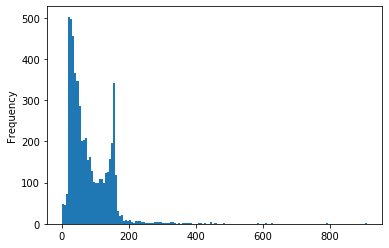

In [71]:
messages['length'].plot.hist(bins=150)

In [72]:
 messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [76]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002036DC840B8>,
      dtype=object)

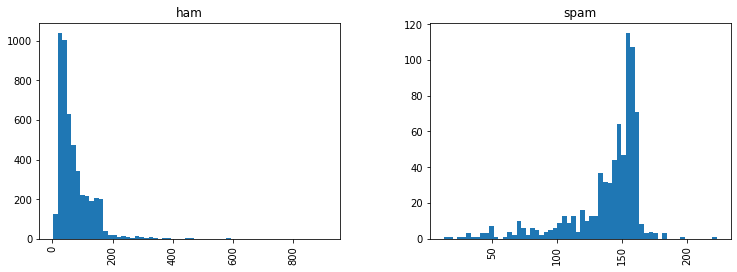

In [79]:
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

In [80]:
import string

In [81]:
mess ="Sample message! Notice: it has punctuation."

In [83]:
nopunc = [c for c in mess if c not in string.punctuation]

In [84]:

from nltk.corpus import stopwords

In [85]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [86]:
nopunc = "".join(nopunc)

In [89]:
nopunc

'Sample message Notice it has punctuation'

In [90]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [92]:
clean_mess =[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [93]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [94]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc =''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

    

In [95]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [96]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object